## 1. Setup enviorment

In [1]:
%cd ..

/home/datascience/TOP 10 Municipalities Models


In [2]:
from Preprocessing.time_series_preprocessing import get_dengue_dataset, get_municipality_name
from Preprocessing.time_series_preprocessing import preprocess_dataset_to_time_series

from Models.LSTM import create_model, train_model
import tensorflow as tf

from Utils.test_lstm import evaluate, plot_predictions, calculate_mean_std, evaluate_lstm_for_city

import pandas as pd
import os
import numpy as np

### Constants

In [3]:
""" Read Dataset:"""

embeddings = None #'Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv'
temp_prec = ['../Tabular_data/precipitation_all.csv', '../Tabular_data/temperature_all 2.csv']
static = None #'../Tabular_data/dengue_tabular.csv'
labels = '../Tabular_data/dengue_tabular.csv'

# Get list of municipalities:
Municipalities = list(pd.unique(pd.read_csv('Embeddings/variational_autoencoder/variational_autoencoder_ResNet50V2__224_1024_3Bands.csv')['Municipality Code']))

""" Dataset Preprocessing:"""
train_percentage = 80
T = 3
autoregressive = False
feature_range = (-1, 1)
fusion = None

""" Model Parameters:"""
model = 'LSTM'

lstm_layers=[1000, 500]
nn_layers=[250, 120, 1]
dense_acivation='relu'
recurrent_cells=model
bidirectional=False

""" Tests: """
n_tests = 5

## Create and Evaluate Model for a City

In [4]:
def run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=True, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion='late', temp_prec=None, static=None):
    results = {}
    
    if type(embeddings) == list:
        for embedding in embeddings:
            results[embedding] = {}
            if type(Municipality) == list:
                for municipality in Municipality:
                    rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embedding, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                    results[embedding][municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
            else:
                rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embedding, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                results[embedding][Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
    else:
        if type(Municipality) == list:
            for municipality in Municipality:
                rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embeddings, municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
                results[municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
        else:
            rmse, mape, smape, r2 = evaluate_lstm_for_city(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor, plot, epochs, batch_size, n_tests, plot_samples, fusion=fusion, temp_prec=temp_prec, static=static)
            results[Municipality] = {'rmse': rmse, 'mape': mape, 'smape': smape, 'r2': r2}
    
    return results

## Run Experiments

In [5]:
# Get list of municipalities:
Municipality = list(pd.unique(pd.read_csv('Embeddings/ResNet50V2_224_1024.csv')['Municipality Code']))

####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Cúcuta-----------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The shape of the features is (128, 6)
The shape of the labels is (128, 1)
The shape of the features is (31, 6)
The shape of the labels is (31, 1)
The initial shapes are:
The train shape is (128, 6)
The test shape is (31, 6)
-----------------------
The Final shapes are:
The train shape is (128, 3, 2)
The test shape is (31, 3, 2)


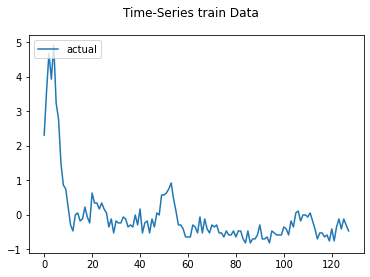

2023-04-29 12:52:49.052051: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-04-29 12:52:49.052097: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-29 12:52:49.052118: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (9e0b1a08816a): /proc/driver/nvidia/version does not exist
2023-04-29 12:52:49.052371: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 12:52:51.299960: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] 

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Test MAE: 64.562
Test RMSE: 84.268
Test sMAPE: 107.596
Test R Squared: -1.299
{'mae': 64.56169765226302, 'rmse': 84.26829290785491, 'smape': 107.59604111044916, 'r2': -1.2990451451312053}


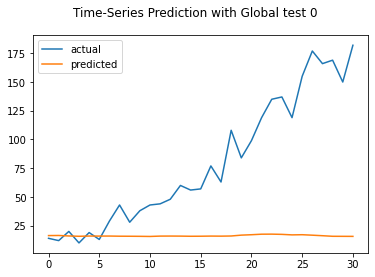

Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
Test MAE: 60.490
Test RMSE: 79.970
Test sMAPE: 95.257
Test R Squared: -1.071
{'mae': 60.490116365494266, 'rmse': 79.97049509968741, 'smape': 95.25721943663471, 'r2': -1.0705164085536696}


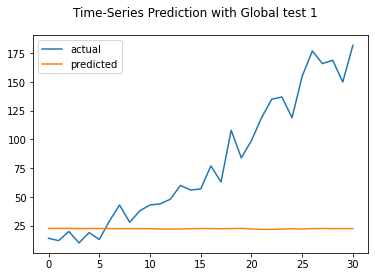

Restoring model weights from the end of the best epoch.
Epoch 00023: early stopping
Test MAE: 64.242
Test RMSE: 84.005
Test sMAPE: 106.399
Test R Squared: -1.285
{'mae': 64.24207004424065, 'rmse': 84.00484692926469, 'smape': 106.39850237228649, 'r2': -1.2846927137545268}


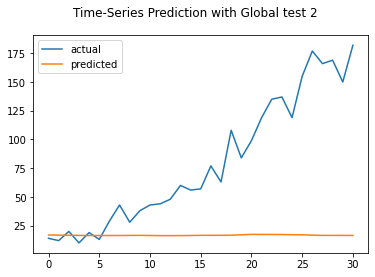

rmse : average=82.748, std=1.967
mae : average=63.098, std=1.849
smape : average=103.084, std=5.556
r2 : average=-1.218, std=0.105
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Neiva------------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The s

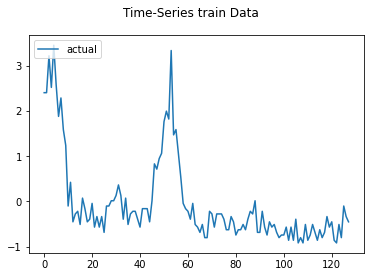

Restoring model weights from the end of the best epoch.
Epoch 00056: early stopping
Test MAE: 5.047
Test RMSE: 6.518
Test sMAPE: 42.780
Test R Squared: 0.187
{'mae': 5.047090868796071, 'rmse': 6.518449383733774, 'smape': 42.780274416459946, 'r2': 0.18740168644904376}


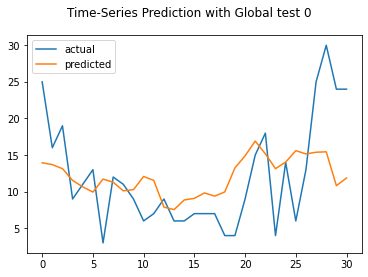

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 9.530
Test RMSE: 10.501
Test sMAPE: 68.099
Test R Squared: -1.109
{'mae': 9.530320198305192, 'rmse': 10.501184136151284, 'smape': 68.09891681008295, 'r2': -1.1089382766002496}


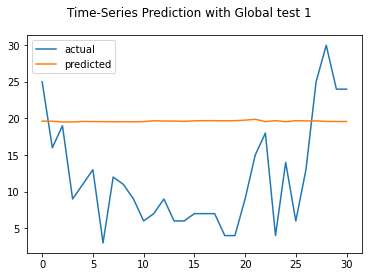

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 9.272
Test RMSE: 10.218
Test sMAPE: 67.073
Test R Squared: -0.997
{'mae': 9.27222664125504, 'rmse': 10.217850191193145, 'smape': 67.07269223979003, 'r2': -0.9966704177315187}


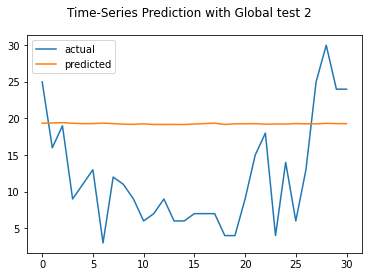

rmse : average=9.079, std=1.814
mae : average=7.950, std=2.055
smape : average=59.317, std=11.701
r2 : average=-0.639, std=0.586
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Medellín----------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The sha

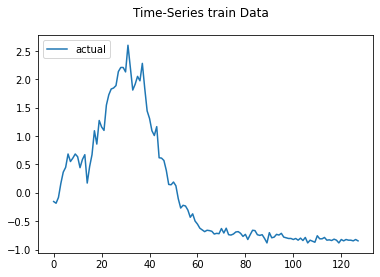

Restoring model weights from the end of the best epoch.
Epoch 00040: early stopping
Test MAE: 70.099
Test RMSE: 70.610
Test sMAPE: 122.358
Test R Squared: -145.676
{'mae': 70.09852280155305, 'rmse': 70.61001137202307, 'smape': 122.3576188469909, 'r2': -145.67631578475763}


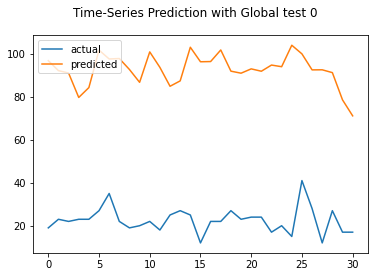

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 156.484
Test RMSE: 156.598
Test sMAPE: 155.593
Test R Squared: -720.442
{'mae': 156.4836179671749, 'rmse': 156.59827930779713, 'smape': 155.592869076643, 'r2': -720.4419659572179}


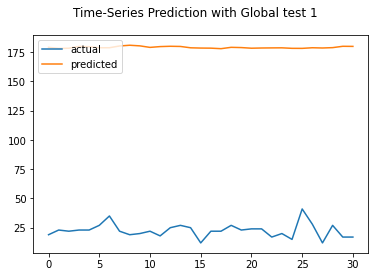

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 144.027
Test RMSE: 144.149
Test sMAPE: 152.691
Test R Squared: -610.299
{'mae': 144.0271916543284, 'rmse': 144.14945899408798, 'smape': 152.69098782811915, 'r2': -610.2986877390865}


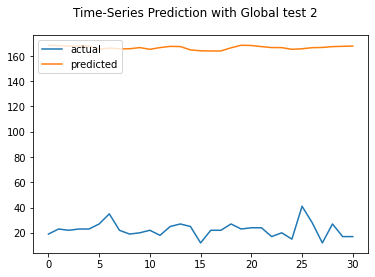

rmse : average=123.786, std=37.943
mae : average=123.536, std=38.127
smape : average=143.547, std=15.030
r2 : average=-492.139, std=249.079
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-------------------------------------------Villavicencio--------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33,

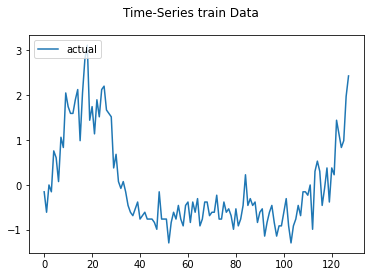

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Test MAE: 29.771
Test RMSE: 34.699
Test sMAPE: 71.754
Test R Squared: -2.593
{'mae': 29.771460317796276, 'rmse': 34.69851367874878, 'smape': 71.75399665742522, 'r2': -2.5929749905450423}


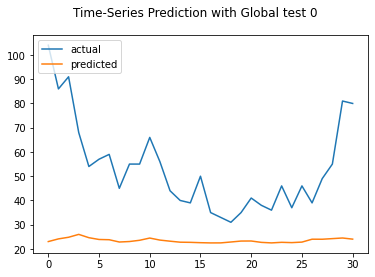

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 34.881
Test RMSE: 39.366
Test sMAPE: 91.568
Test R Squared: -3.625
{'mae': 34.88050350066154, 'rmse': 39.366028765404934, 'smape': 91.56790299272599, 'r2': -3.6246158265143187}


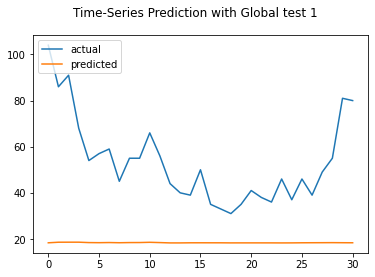

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 34.620
Test RMSE: 39.163
Test sMAPE: 90.432
Test R Squared: -3.577
{'mae': 34.6200008392334, 'rmse': 39.16332000058275, 'smape': 90.43234074111649, 'r2': -3.5771110834615563}


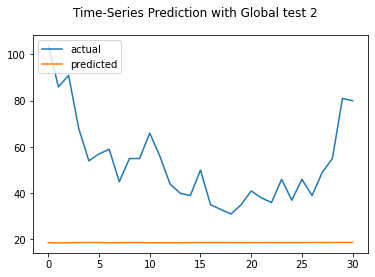

rmse : average=37.743, std=2.154
mae : average=33.091, std=2.349
smape : average=84.585, std=9.085
r2 : average=-3.265, std=0.476
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Bucaramanga---------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The sh

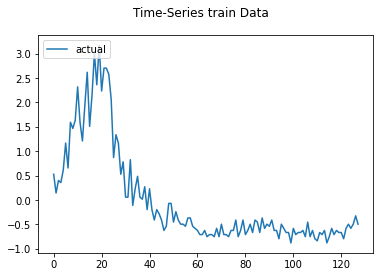

Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Test MAE: 5.498
Test RMSE: 6.971
Test sMAPE: 38.628
Test R Squared: -0.607
{'mae': 5.49761535275367, 'rmse': 6.970544894097041, 'smape': 38.62845850682648, 'r2': -0.606576684968279}


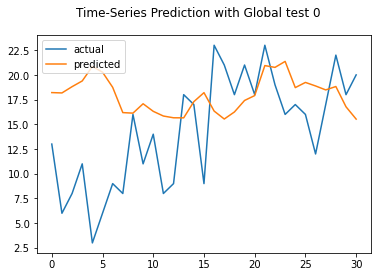

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 8.183
Test RMSE: 9.891
Test sMAPE: 49.981
Test R Squared: -2.235
{'mae': 8.183439254760742, 'rmse': 9.891214390759345, 'smape': 49.980520191654485, 'r2': -2.234947473201559}


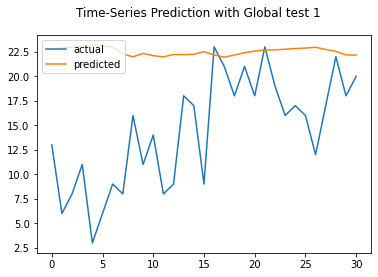

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 8.378
Test RMSE: 9.984
Test sMAPE: 50.848
Test R Squared: -2.296
{'mae': 8.37764407742408, 'rmse': 9.98395126878122, 'smape': 50.84843183728168, 'r2': -2.2958915119336503}


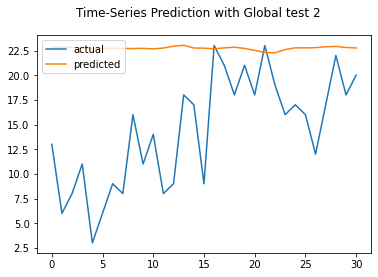

rmse : average=8.949, std=1.399
mae : average=7.353, std=1.314
smape : average=46.486, std=5.567
r2 : average=-1.712, std=0.782
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
--------------------------------------------Barranquilla--------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The shap

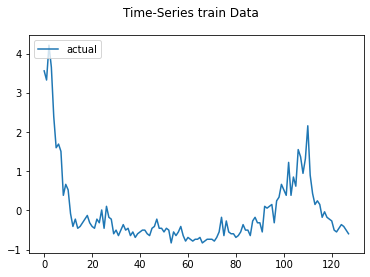

Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Test MAE: 22.732
Test RMSE: 29.076
Test sMAPE: 64.751
Test R Squared: -1.572
{'mae': 22.73190572184901, 'rmse': 29.076175018153467, 'smape': 64.75138072484211, 'r2': -1.571947258515706}


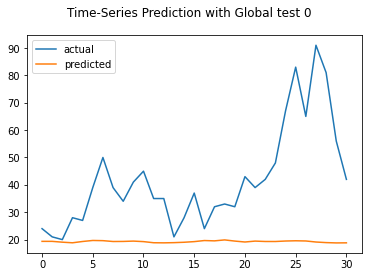

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 24.852
Test RMSE: 30.762
Test sMAPE: 74.662
Test R Squared: -1.879
{'mae': 24.851612091064453, 'rmse': 30.76243661466655, 'smape': 74.66156004018748, 'r2': -1.878915868558655}


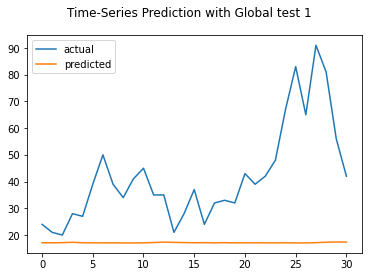

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 24.716
Test RMSE: 30.638
Test sMAPE: 74.022
Test R Squared: -1.856
{'mae': 24.716150714505105, 'rmse': 30.638481848307226, 'smape': 74.02211288421806, 'r2': -1.8557618909755238}


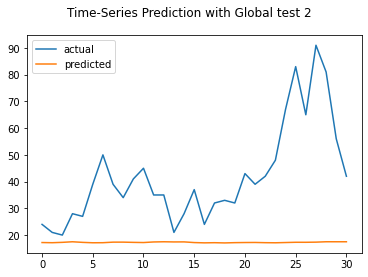

rmse : average=30.159, std=0.767
mae : average=24.100, std=0.969
smape : average=71.145, std=4.529
r2 : average=-1.769, std=0.140
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
----------------------------------------------Montería----------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The sh

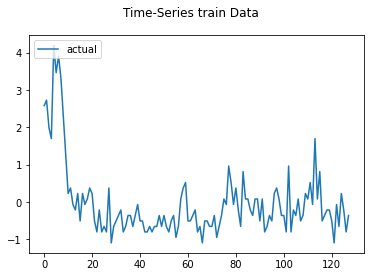

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 38.763
Test RMSE: 47.125
Test sMAPE: 123.449
Test R Squared: -2.014
{'mae': 38.76314021695045, 'rmse': 47.12488381685392, 'smape': 123.448600229359, 'r2': -2.014108063301359}


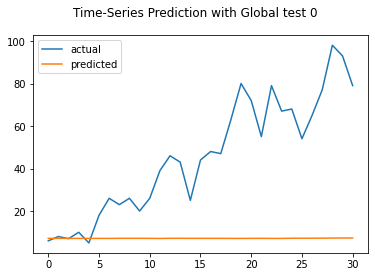

Restoring model weights from the end of the best epoch.
Epoch 00055: early stopping
Test MAE: 36.357
Test RMSE: 44.599
Test sMAPE: 109.775
Test R Squared: -1.700
{'mae': 36.35659854642807, 'rmse': 44.59922318845877, 'smape': 109.7750627749628, 'r2': -1.699683316144033}


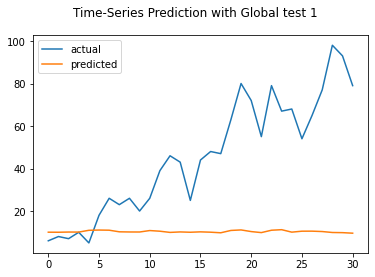

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 38.863
Test RMSE: 47.239
Test sMAPE: 124.028
Test R Squared: -2.029
{'mae': 38.86293178989041, 'rmse': 47.23927922796856, 'smape': 124.02835548912326, 'r2': -2.0287592880195824}


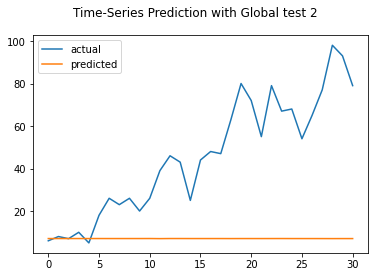

rmse : average=46.321, std=1.218
mae : average=37.994, std=1.159
smape : average=119.084, std=6.587
r2 : average=-1.914, std=0.152
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
------------------------------------------------Cali------------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The s

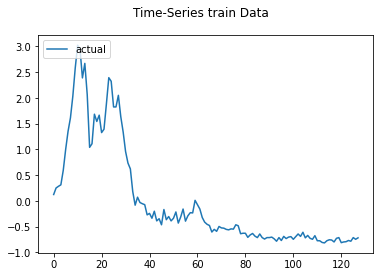

Restoring model weights from the end of the best epoch.
Epoch 00034: early stopping
Test MAE: 80.137
Test RMSE: 81.103
Test sMAPE: 112.657
Test R Squared: -42.576
{'mae': 80.13729341568485, 'rmse': 81.10298274430616, 'smape': 112.65749746812553, 'r2': -42.576201236952414}


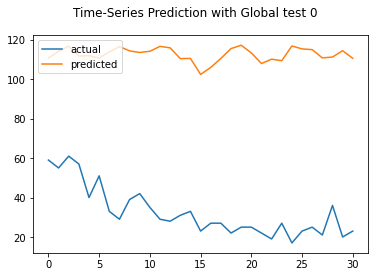

Restoring model weights from the end of the best epoch.
Epoch 00061: early stopping
Test MAE: 101.795
Test RMSE: 105.398
Test sMAPE: 122.090
Test R Squared: -72.594
{'mae': 101.79530605193108, 'rmse': 105.39827609812947, 'smape': 122.09017246980812, 'r2': -72.59405443874044}


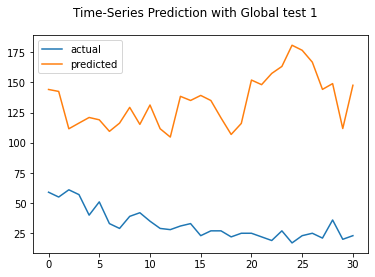

Restoring model weights from the end of the best epoch.
Epoch 00050: early stopping
Test MAE: 126.494
Test RMSE: 127.494
Test sMAPE: 133.294
Test R Squared: -106.686
{'mae': 126.49378425844255, 'rmse': 127.49439072570125, 'smape': 133.29442452340882, 'r2': -106.68565903435534}


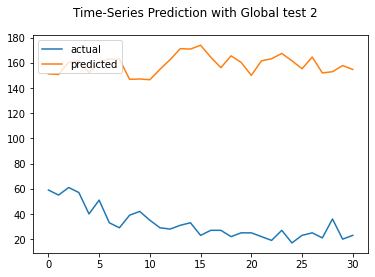

rmse : average=104.665, std=18.946
mae : average=102.809, std=18.939
smape : average=122.681, std=8.435
r2 : average=-73.952, std=26.190
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Ibagué-----------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)

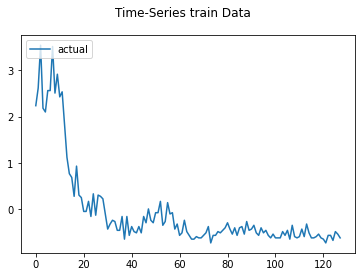

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 16.994
Test RMSE: 17.756
Test sMAPE: 81.987
Test R Squared: -10.215
{'mae': 16.99376832285235, 'rmse': 17.755825289876768, 'smape': 81.98736852104216, 'r2': -10.21543746899263}


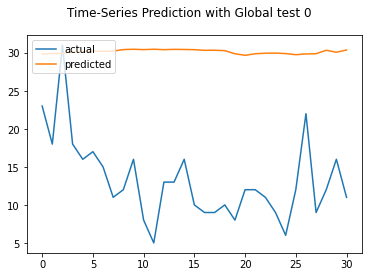

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 18.368
Test RMSE: 19.099
Test sMAPE: 85.536
Test R Squared: -11.977
{'mae': 18.367793667700983, 'rmse': 19.099232631060094, 'smape': 85.53642033333922, 'r2': -11.976761690184052}


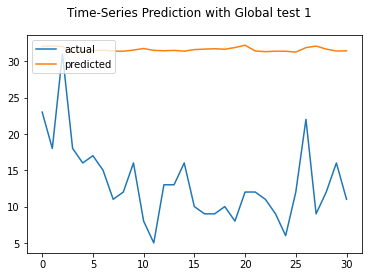

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 17.287
Test RMSE: 18.053
Test sMAPE: 82.762
Test R Squared: -10.593
{'mae': 17.287390247468025, 'rmse': 18.052518318285966, 'smape': 82.76156052094821, 'r2': -10.593380260028148}


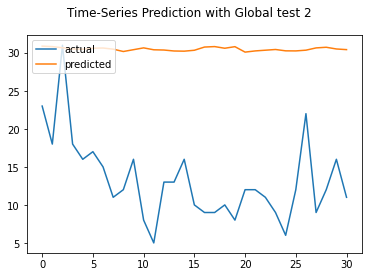

rmse : average=18.303, std=0.576
mae : average=17.550, std=0.591
smape : average=83.428, std=1.524
r2 : average=-10.929, std=0.757
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################
####################################################################################################
---------------------------------------Autoregressive Model: ---------------------------------------
-------------------------------------------Municipality: -------------------------------------------
-----------------------------------------------Itagüí-----------------------------------------------
####################################################################################################
The train shape is: (130, 3)
The test shape is: (33, 3)
The s

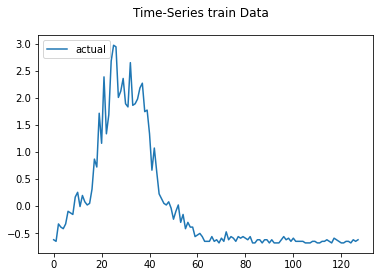

Restoring model weights from the end of the best epoch.
Epoch 00037: early stopping
Test MAE: 11.556
Test RMSE: 11.658
Test sMAPE: 172.188
Test R Squared: -139.432
{'mae': 11.556255309812483, 'rmse': 11.657697631531015, 'smape': 172.18777548214945, 'r2': -139.43197787047728}


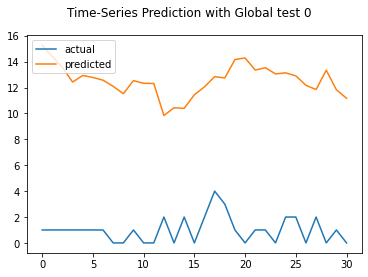

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping
Test MAE: 23.960
Test RMSE: 23.981
Test sMAPE: 185.119
Test R Squared: -593.260
{'mae': 23.959972504646547, 'rmse': 23.981031729699087, 'smape': 185.11904661719316, 'r2': -593.2595455815288}


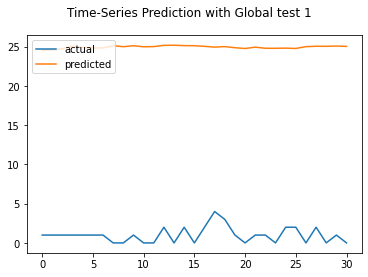

Restoring model weights from the end of the best epoch.
Epoch 00042: early stopping
Test MAE: 17.454
Test RMSE: 17.521
Test sMAPE: 180.614
Test R Squared: -316.225
{'mae': 17.453940422304214, 'rmse': 17.521177338550945, 'smape': 180.61426887676762, 'r2': -316.2247105065829}


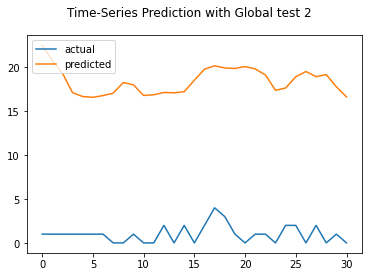

rmse : average=17.720, std=5.033
mae : average=17.657, std=5.066
smape : average=179.307, std=5.359
r2 : average=-349.639, std=186.775
####################################################################################################
----------------------------------------------- End ------------------------------------------------
####################################################################################################


In [6]:
results = run_experiments(labels, embeddings, Municipality, train_percentage, T, autoregressive, lstm_layers, nn_layers, dense_acivation, recurrent_cells, bidirectional, monitor=True, plot=None, epochs=100, batch_size=16, n_tests=3, plot_samples=True, fusion=fusion, temp_prec=temp_prec, static=static)

In [7]:
results

{54001: {'rmse': [82.74787831226901, 1.9668492702893081],
  'mape': [63.09796135399932, 1.8486359052024797],
  'smape': [103.08392097312345, 5.5558658169125765],
  'r2': [-1.2180847558131338, 0.10451095925395561]},
 41001: {'rmse': [9.079161237026069, 1.814387578548223],
  'mape': [7.949879236118768, 2.0552839706709913],
  'smape': [59.31729448877764, 11.700941810280261],
  'r2': [-0.6394023359609081, 0.5864325403878946]},
 5001: {'rmse': [123.7859165579694, 37.94294797068637],
  'mape': [123.53644414101878, 38.12697397673585],
  'smape': [143.54715858391768, 15.030029372165425],
  'r2': [-492.1389898270207, 249.07853354922116]},
 50001: {'rmse': [37.74262081491216, 2.1540990232832096],
  'mape': [33.090654885897074, 2.3494332429808336],
  'smape': [84.58474679708924, 9.084546852271947],
  'r2': [-3.264900633506972, 0.47551882360601994]},
 68001: {'rmse': [8.94857018454587, 1.3991873997378355],
  'mape': [7.352899561646164, 1.3142776216387995],
  'smape': [46.485803511920885, 5.5672686